In [103]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from keras.preprocessing.image import ImageDataGenerator
from scipy import ndimage

In [104]:
no_data_dir = 'MRI_Tumor_Binary_Classification_Data/no/'
yes_data_dir = 'MRI_Tumor_Binary_Classification_Data/yes/'

In [105]:
no_samples = []
yes_samples = []

for samples in os.listdir(no_data_dir):
    sample = mpimg.imread(no_data_dir + samples)
    no_samples.append(sample)
    
for samples in os.listdir(yes_data_dir):
    sample = mpimg.imread(yes_data_dir + samples)
    yes_samples.append(sample)

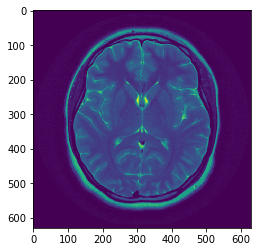

In [106]:
plt.imshow(no_samples[0])

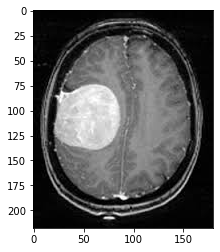

In [107]:
plt.imshow(yes_samples[0])

In [108]:
# Number of samples in each class
print(len(no_samples))
print(len(yes_samples))

print('Percentage of Samples Distribution')
print(len(no_samples)/(len(no_samples) + len(yes_samples)))
print(len(yes_samples)/(len(no_samples) + len(yes_samples)))

98
155
Percentage of Samples Distribution
0.38735177865612647
0.6126482213438735


# Data Processing

In [110]:
for i in no_samples:
    print(i.shape)

(630, 630)
(201, 173, 3)
(168, 300, 3)
(183, 275, 3)
(168, 300, 3)
(197, 177, 3)
(217, 232, 3)
(231, 218, 3)
(221, 228, 3)
(200, 200, 3)
(630, 630, 3)
(259, 194, 3)
(225, 225, 3)
(243, 207, 3)
(242, 208, 3)
(214, 235, 3)
(217, 232, 3)
(252, 200, 3)
(231, 218, 3)
(251, 201, 3)
(234, 215, 3)
(225, 225, 3)
(242, 208, 3)
(252, 200, 3)
(225, 225, 3)
(213, 236, 3)
(198, 150, 3)
(225, 225, 3)
(221, 228, 3)
(225, 225, 3)
(251, 201, 3)
(225, 225, 3)
(250, 201, 3)
(225, 225, 3)
(225, 225, 3)
(168, 300, 3)
(194, 259, 3)
(442, 441, 3)
(474, 356, 3)
(530, 380, 3)
(225, 225, 3)
(630, 630)
(225, 225, 3)
(225, 225, 3)
(222, 227, 3)
(192, 192, 3)
(417, 428, 3)
(251, 201, 3)
(201, 173, 3)
(338, 276, 3)
(614, 630, 3)
(225, 225)
(238, 212, 3)
(393, 350, 3)
(282, 230, 3)
(248, 208, 3)
(262, 227, 3)
(1024, 1024)
(326, 276, 3)
(264, 210, 3)
(275, 220)
(250, 201, 3)
(257, 196, 3)
(225, 225, 3)
(750, 750)
(225, 225, 3)
(217, 232, 3)
(225, 225, 3)
(275, 220)
(442, 442)
(236, 214, 3)
(630, 630, 3)
(361, 642, 3)


In [111]:
for i in yes_samples:
    print(i.shape)

(218, 180, 3)
(360, 319)
(348, 287, 3)
(336, 300)
(630, 587, 3)
(993, 825, 3)
(890, 700, 3)
(246, 205, 3)
(253, 200, 3)
(512, 512, 3)
(1200, 1059, 3)
(279, 258, 3)
(369, 400, 3)
(324, 272, 3)
(366, 310, 3)
(312, 254, 3)
(249, 178, 3)
(298, 260, 3)
(269, 249, 3)
(310, 246, 3)
(500, 377)
(245, 224, 3)
(325, 254, 3)
(300, 289)
(355, 311, 3)
(352, 321, 3)
(283, 231, 3)
(380, 310, 3)
(359, 300, 3)
(431, 400, 3)
(355, 310, 3)
(370, 286, 3)
(309, 232, 3)
(334, 283, 3)
(354, 303, 3)
(360, 313, 3)
(348, 297, 3)
(351, 273, 3)
(1200, 1059, 3)
(316, 270, 3)
(336, 264, 3)
(303, 223, 3)
(291, 253, 3)
(350, 272, 3)
(300, 263, 3)
(325, 254, 3)
(300, 289)
(355, 290, 3)
(354, 279, 3)
(586, 467, 3)
(380, 310, 3)
(318, 273, 3)
(347, 300, 3)
(173, 189, 3)
(380, 318, 3)
(450, 355, 3)
(244, 206, 3)
(879, 766, 3)
(359, 297, 3)
(342, 273, 3)
(351, 262, 3)
(256, 256, 3)
(340, 314, 3)
(212, 209, 3)
(300, 240, 3)
(247, 204, 3)
(380, 294, 3)
(277, 272, 3)
(1024, 1024)
(344, 279, 3)
(331, 272, 3)
(351, 278, 3)
(237

In [112]:
# Some of the samples in yes and no classes are in 3 dimensions, while the rest are in 2. So let's convert the yes samples to 
# 2 dimensions by taking the mean along the third axis

for ind in range(len(yes_samples)):
    temp = yes_samples[ind]
    if len(temp.shape) == 3:
        yes_samples[ind] = temp.mean(axis = 2)

for ind in range(len(no_samples)):
    temp = no_samples[ind]
    if len(temp.shape) == 3:
        no_samples[ind] = temp.mean(axis = 2)

In [113]:
# Resizing Images - we can use this as a hyperparameter but for now, let's construct 300x300 pixel images from those we have

width = 300
height = 300

no_processed = []
yes_processed = []

for i in yes_samples:
    yes_processed.append(cv2.resize(i, (width, height), interpolation=cv2.INTER_LINEAR))

for i in no_samples:
    no_processed.append(cv2.resize(i, (width, height), interpolation=cv2.INTER_LINEAR))

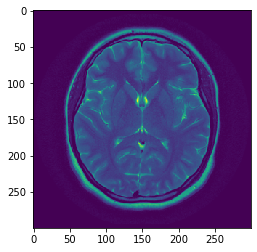

In [114]:
plt.imshow(no_processed[0])

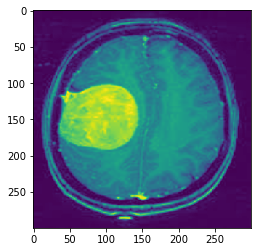

In [115]:
plt.imshow(yes_processed[0])

In [116]:
# We can increase the number of yes and no samples by created denoised versions of the existing images using a Gaussian blur

no_denoised = []
yes_denoised = []

denoising_kernel = (11, 11)

for i in yes_processed:
    yes_denoised.append(cv2.GaussianBlur(i, denoising_kernel, 0))

for i in no_processed:
    no_denoised.append(cv2.GaussianBlur(i, denoising_kernel, 0))

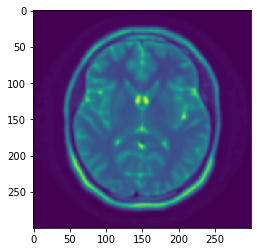

In [117]:
plt.imshow(no_denoised[0])

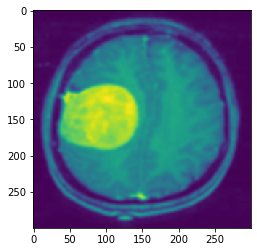

In [118]:
plt.imshow(yes_denoised[0])

In [119]:
# We can further remove noise by segmenting the image using thresholding, with 128 as threshold. 
# But first, we should normalize the pixel values in each image from 0 to 255

no_seg = []
yes_seg = []

for i in yes_denoised:
    temp = cv2.normalize(i, i, 0, 255, cv2.NORM_MINMAX)
    yes_seg.append(cv2.threshold(temp, 127, 255, cv2.THRESH_BINARY)[1])

for i in no_denoised:
    temp = cv2.normalize(i, i, 0, 255, cv2.NORM_MINMAX)
    no_seg.append(cv2.threshold(temp, 127, 255, cv2.THRESH_BINARY)[1])

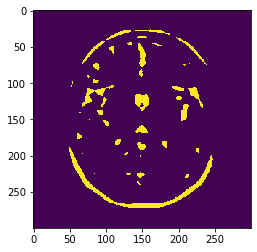

In [120]:
plt.imshow(no_seg[0])

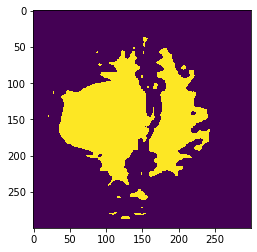

In [121]:
plt.imshow(yes_seg[0])

In [136]:
# Let's also create some additional data - rotational, translational transformations

no_translation = []
yes_translation = []

no_rot = []
yes_rot = []

for i in yes_processed:
    yes_translation.append(cv2.warpAffine(i, 
                                          np.float32([[1, 0, random.randint(-50, 50)], [0, 1, random.randint(-50, 50)]]), 
                                          (i.shape[1], i.shape[0])))
    yes_rot.append(ndimage.rotate(i, random.randint(1, 359)))

for i in no_processed:
    no_translation.append(cv2.warpAffine(i, 
                                          np.float32([[1, 0, random.randint(-50, 50)], [0, 1, random.randint(-50, 50)]]), 
                                          (i.shape[1], i.shape[0])))
    no_rot.append(ndimage.rotate(i, random.randint(1, 359)))

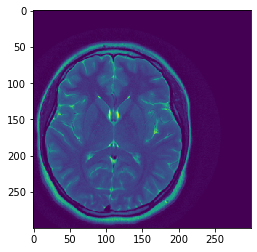

In [137]:
plt.imshow(no_translation[0])

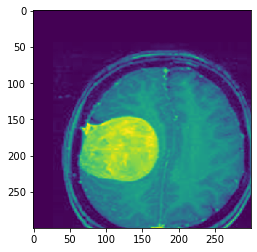

In [138]:
plt.imshow(yes_translation[0])

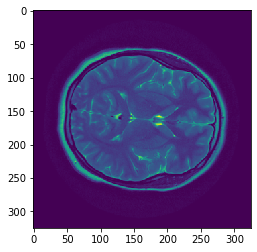

In [139]:
plt.imshow(no_rot[0])

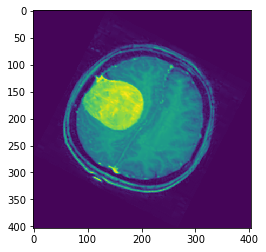

In [140]:
plt.imshow(yes_rot[0])